In [1]:
import os 
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
from neo.core import SpikeTrain
from quantities import ms, s, Hz
from elephant.statistics import mean_firing_rate
from elephant.statistics import time_histogram, instantaneous_rate
from elephant.kernels import GaussianKernel

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
file_to_use = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\data.csv'

In [4]:
df = pd.read_csv(file_to_use, sep=',', index_col=0)

In [5]:
df

,cluster_id,fixed_times,trial,Delay_ON,Delay_OFF,Delay_length,Stimulus_ON,Response_ON,START,END,a_Stimulus_ON,a_Delay_ON,a_Delay_OFF,a_Response_ON,vector_answer,reward_side,hit
0,1193,88.264567,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,-0.396800,-0.796800,-0.896833,-1.096833,0,0.0,1.0
1,1193,88.419400,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,-0.241967,-0.641967,-0.742000,-0.942000,0,0.0,1.0
2,1193,88.453467,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,-0.207900,-0.607900,-0.707933,-0.907933,0,0.0,1.0
3,1193,88.669733,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,0.008367,-0.391633,-0.491667,-0.691667,0,0.0,1.0
4,1193,88.820100,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,0.158733,-0.241267,-0.341300,-0.541300,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265735,943,2626.225300,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,3.652733,3.252733,0.252667,0.052667,0,1.0,0.0
265736,943,2626.795500,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,4.222933,3.822933,0.822867,0.622867,0,1.0,0.0
265737,943,2627.401300,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,4.828733,4.428733,1.428667,1.228667,0,1.0,0.0
265738,943,2628.004167,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,5.431600,5.031600,2.031533,1.831533,0,1.0,0.0


In [6]:
##all neurons (id)
df.cluster_id.unique()

array([1193, 1794, 1215,  301, 1402, 1621,  294, 1542, 1548, 1759, 1574,
        474, 1708, 1713,  785, 1791, 1399, 1406, 1441, 1097, 1430, 1386,
       1611, 1761, 1375, 1749, 1145, 1688, 1709, 1479, 1035, 1073, 1380,
       1763, 1352, 1231, 1698, 1788, 1225,   21,  231, 1766,  578,  606,
       1203,  943,  648,  895,  590,  520, 1426, 1540, 1774,  909],
      dtype=int64)

### Example 1 neuron convoluted firing

In [162]:
N = 1794
T = 2
############################################################ Select neuron and trial
nx = df.loc[df['cluster_id']==N]
nxt = nx.loc[nx['trial']==T]
############################################################ Get the times of the spikes
times_spikes = nxt.fixed_times.values
times_spikes = times_spikes*1000 #transform to ms
############################################################ Set the strat and end time of the train
stop_time =  nxt.END.unique()[0]*1000*ms ## End of the trial in ms
start_time = nxt.START.unique()[0]*1000*ms ## Start of the trial in ms
############################################################ Spiketrain
spiketrain = SpikeTrain(times_spikes, units=ms, t_stop=stop_time, t_start=start_time) 
############################################################ Convoluted firing rate
histogram_rate = time_histogram([spiketrain], 100*ms, output='rate')
inst_rate = instantaneous_rate(spiketrain, sampling_period=25*ms) ##change the sampling period to change the resolution
times_ = inst_rate.times.rescale(ms)
firing= inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten()
############################################################ Dataframe 
df_trial = pd.DataFrame({'times':times_, 'firing':firing}) #dataframe con times y firing
df_trial['trial']=T
df_trial['neuron']=N
df_trial['Delay_ON']= nxt.Delay_ON.unique()[0]*1000
df_trial['Delay_OFF']= nxt.Delay_OFF.unique()[0]*1000
df_trial['Stimulus_ON']= nxt.Stimulus_ON.unique()[0]*1000
df_trial['Response_ON']= nxt.Response_ON.unique()[0]*1000
df_trial['START']= nxt.START.unique()[0]*1000
df_trial['END']= nxt.END.unique()[0]*1000
df_trial['vector_answer']=nxt.vector_answer.unique()[0]
df_trial['reward_side']=nxt.reward_side.unique()[0]
df_trial['hit']=nxt.hit.unique()[0]


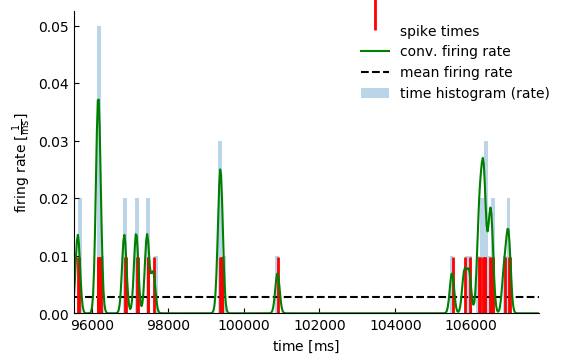

In [163]:
plt.figure(dpi=100) #dpi=150

# plotting the spikes
plt.plot(spiketrain, [0]*len(spiketrain), 'r', marker=2, ms=40, markeredgewidth=2, lw=0, label='spike times')

# mean firing rate
plt.hlines(mean_firing_rate(spiketrain), xmin=spiketrain.t_start, xmax=spiketrain.t_stop, linestyle='--', label='mean firing rate')

# time histogram
plt.bar(histogram_rate.times, histogram_rate.magnitude.flatten(), width=histogram_rate.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')


# convoluted firing rate
plt.plot(inst_rate.times.rescale(ms), inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten(), color='g', label='conv. firing rate')


# axis labels and legend
plt.xlabel('time [{}]'.format(spiketrain.times.dimensionality.latex))
plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
plt.xlim(spiketrain.t_start, spiketrain.t_stop)
plt.legend( frameon=False, bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.show()

In [159]:
df_trial

,firing,times,trial,neuron,Delay_ON,Delay_OFF,Stimulus_ON,Response_ON,START,END
0,3.362203e-03,95532.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
1,6.280307e-03,95557.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
2,9.765606e-03,95582.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
3,1.264571e-02,95607.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
4,1.363996e-02,95632.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
...,...,...,...,...,...,...,...,...,...,...
485,-1.368453e-18,107657.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
486,-1.184238e-18,107682.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
487,2.664535e-19,107707.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
488,-9.424560e-19,107732.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667


In [180]:
len(df.cluster_id.unique())

54

## Convoluted firing rate each neuron

In [181]:
errors_=[] ##indexes and neurons without enough spikes to make a spiketrain

for idx, N in enumerate(df.cluster_id.unique()):
    print(idx, N)
    nx = df.loc[df['cluster_id']==N]
    frames=[]
    for T in nx.trial.unique():
        nxt = nx.loc[nx['trial']==T]
        ############################################################ Get the times of the spikes
        times_spikes = nxt.fixed_times.values
        times_spikes = times_spikes*1000 #transform to ms
        ############################################################ Set the strat and end time of the train
        stop_time =  nxt.END.unique()[0]*1000*ms ## End of the trial in ms
        start_time = nxt.START.unique()[0]*1000*ms ## Start of the trial in ms
        ############################################################ Spiketrain
        try: 
            spiketrain = SpikeTrain(times_spikes, units=ms, t_stop=stop_time, t_start=start_time) 
            ############################################################ Convoluted firing rate
            histogram_rate = time_histogram([spiketrain], 100*ms, output='rate')
            inst_rate = instantaneous_rate(spiketrain, sampling_period=25*ms) ##change the sampling period to change the resolution
            times_ = inst_rate.times.rescale(ms)
            firing= inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten()
            ############################################################ Dataframe 
            df_trial = pd.DataFrame({'times':times_, 'firing':firing}) #dataframe con times y firing
            df_trial['trial']=T
            df_trial['neuron']=N
            df_trial['Delay_ON']= nxt.Delay_ON.unique()[0]*1000
            df_trial['Delay_OFF']= nxt.Delay_OFF.unique()[0]*1000
            df_trial['Stimulus_ON']= nxt.Stimulus_ON.unique()[0]*1000
            df_trial['Response_ON']= nxt.Response_ON.unique()[0]*1000
            df_trial['START']= nxt.START.unique()[0]*1000
            df_trial['END']= nxt.END.unique()[0]*1000
            df_trial['vector_answer']=nxt.vector_answer.unique()[0]
            df_trial['reward_side']=nxt.reward_side.unique()[0]
            df_trial['hit']=nxt.hit.unique()[0]
            frames.append(df_trial)
            ############################################################## PLOT
#             plt.figure(dpi=100) #dpi=150
#             # plotting the spikes
#             plt.plot(spiketrain, [0]*len(spiketrain), 'r', marker=2, ms=40, markeredgewidth=2, lw=0, label='spike times')
#             # mean firing rate
#             plt.hlines(mean_firing_rate(spiketrain), xmin=spiketrain.t_start, xmax=spiketrain.t_stop, linestyle='--', label='mean firing rate')
#             # time histogram
#             plt.bar(histogram_rate.times, histogram_rate.magnitude.flatten(), width=histogram_rate.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')
#             # convoluted firing rate
#             plt.plot(inst_rate.times.rescale(ms), inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten(), color='g', label='conv. firing rate')
#             # axis labels and legend
#             plt.xlabel('time [{}]'.format(spiketrain.times.dimensionality.latex))
#             plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
#             plt.xlim(spiketrain.t_start, spiketrain.t_stop)
#             plt.legend( frameon=False, bbox_to_anchor=(1.05, 1))
#             plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
#             plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
#             plt.gca().get_xaxis().tick_bottom()                                                                                         
#             plt.gca().get_yaxis().tick_left()
#             plt.gca().tick_params(direction='in') #direction
#             plt.title(str(N)+' '+str(T))
#             plt.show()
        except ValueError:
            errors_.append([N,T])
            print (N, T)

    ####
    neuron = pd.concat(frames)
    neuron.to_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\neurons\\' + str(N) + '.xlsx')

0 1193
1193 5


C:\Users\David\AppData\Roaming\Python\Python35\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 1 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))


1193 11
1193 12


C:\Users\David\AppData\Roaming\Python\Python35\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 2 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))


1193 32
1193 40
1193 42
1193 56
1193 94
1193 96
1193 100
1193 115
1193 118
1193 121
1193 146
1193 152
1193 154
1193 156
1193 169
1193 172
1193 197
1193 199
1193 211
1193 213


C:\Users\David\AppData\Roaming\Python\Python35\site-packages\quantities\quantity.py:424: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
C:\Users\David\AppData\Roaming\Python\Python35\site-packages\elephant\statistics.py:762: UserWarning: Spiketrains have different t_stop values -- using minimum t_stop as t_stop.
  "Spiketrains have different t_stop values -- "
C:\Users\David\AppData\Roaming\Python\Python35\site-packages\quantities\quantity.py:396: RuntimeWarning: invalid value encountered in less_equal
  return self.magnitude <= other
C:\Users\David\AppData\Roaming\Python\Python35\site-packages\quantities\quantity.py:391: RuntimeWarning: invalid value encountered in less
  return self.magnitude < other


1193 222
1 1794
1794 5
1794 27
1794 52
1794 94
1794 102
1794 106
1794 107


C:\Users\David\AppData\Roaming\Python\Python35\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 4 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
C:\Users\David\AppData\Roaming\Python\Python35\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 3 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))


1794 115
1794 159
1794 184
1794 186
1794 207
1794 222
2 1215
1215 2
1215 7
1215 20
1215 24
1215 27
1215 90
1215 99
1215 101
1215 102
1215 103
1215 104
1215 105
1215 106
1215 107
1215 110
1215 111
1215 114
1215 116
1215 117
1215 120
1215 121
1215 122
3 301
301 9
301 14


C:\Users\David\AppData\Roaming\Python\Python35\site-packages\elephant\conversion.py:990: UserWarning: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
  'behaviour.'.format(num_rounding_corrections))


301 23
301 35
301 43
301 49
301 58
301 74
301 98
301 106
301 160
301 161
301 180
301 183
301 187
301 189
301 191
301 196
301 199
301 200
301 202
301 213
301 214
301 218
301 222
4 1402
1402 45
1402 65
1402 69
1402 84
1402 87
1402 98
1402 160
1402 164
1402 203
1402 222
5 1621
1621 4
1621 8
1621 10
1621 13
1621 16
1621 18
1621 20
1621 21
1621 22
1621 25
1621 31
1621 33
1621 36
1621 40
1621 42
1621 43
1621 46
1621 50
1621 56
1621 57
1621 61
1621 68
1621 74
1621 79
1621 81
1621 82
1621 92
1621 98
1621 99
6 294
294 5
294 6
294 8
294 15
294 16
294 17
294 19
294 22
294 24
294 25
294 26
294 27
294 29
294 32
294 40
294 41
294 43
294 47
294 49
294 51
294 53
294 54
294 57
294 60
294 61
294 67
294 76
294 81
294 86
294 88
294 96
294 99
294 102
294 104
294 106
294 109
294 112
294 115
294 119
7 1542
1542 4
1542 6
1542 8
1542 11
1542 18
1542 20
1542 22
1542 25
1542 31
1542 32
1542 34
1542 39
1542 52
1542 62
1542 67
1542 73
1542 79
8 1548
1548 7
1548 12
1548 18
1548 22
1548 25
1548 26
1548 27
1548 28
15

C:\Users\David\AppData\Roaming\Python\Python35\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 5 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))


1375 128
1375 133
1375 136
1375 142
1375 144
1375 146
1375 220
1375 222
25 1749
1749 9
1749 24
1749 77
1749 81
1749 88
1749 91
1749 92
1749 97
1749 103
1749 106
1749 113
1749 116
1749 118
1749 121
1749 124
1749 125
1749 126
1749 135
1749 136
1749 137
1749 140
1749 146
26 1145
1145 1
1145 5
1145 6
1145 7
1145 13
1145 18
1145 21
1145 26
1145 33
1145 40
1145 43
1145 172
27 1688
1688 11
1688 18
1688 37
1688 44
1688 51
1688 53
1688 64
1688 71
1688 78
1688 95
1688 105
1688 119
1688 123
1688 131
1688 132
1688 196
1688 207
1688 222
28 1709
1709 7
1709 8
1709 11
1709 19
1709 59
1709 104
1709 106
1709 108
1709 112
1709 113
1709 117
1709 120
1709 122
1709 132
1709 137
1709 153
1709 164
1709 175
1709 181
1709 184
1709 185
1709 187
1709 188
1709 189
1709 192
1709 193
1709 199
1709 209
1709 210
1709 213
1709 222
29 1479
1479 2
1479 4
1479 5
1479 16
1479 21
1479 22
1479 28
1479 29
1479 31
1479 33
1479 35
1479 42
1479 45
1479 47
1479 55
1479 56
1479 57
1479 58
1479 65
1479 67
1479 74
1479 76
1479 84
1

## Trial average

In [197]:
neuron

,firing,times,trial,neuron,Delay_ON,Delay_OFF,Stimulus_ON,Response_ON,START,END,vector_answer,reward_side,hit,time_centered,firing_
0,1.263187e-18,319865.233333,28,909,320765.233333,320865.266667,320365.233333,321065.266667,319865.233333,327329.200000,0,0.0,1.0,-0.5,1.263187e-15
1,-1.263187e-18,319890.233333,28,909,320765.233333,320865.266667,320365.233333,321065.266667,319865.233333,327329.200000,0,0.0,1.0,-0.5,-1.263187e-15
2,0.000000e+00,319915.233333,28,909,320765.233333,320865.266667,320365.233333,321065.266667,319865.233333,327329.200000,0,0.0,1.0,-0.4,0.000000e+00
3,3.157968e-19,319940.233333,28,909,320765.233333,320865.266667,320365.233333,321065.266667,319865.233333,327329.200000,0,0.0,1.0,-0.4,3.157968e-16
4,0.000000e+00,319965.233333,28,909,320765.233333,320865.266667,320365.233333,321065.266667,319865.233333,327329.200000,0,0.0,1.0,-0.4,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,3.425973e-08,435988.166667,37,909,419788.166667,429788.300000,419388.166667,429988.300000,418888.166667,436136.633333,0,0.0,1.0,16.6,3.425973e-05
685,2.225087e-08,436013.166667,37,909,419788.166667,429788.300000,419388.166667,429988.300000,418888.166667,436136.633333,0,0.0,1.0,16.6,2.225087e-05
686,1.432829e-08,436038.166667,37,909,419788.166667,429788.300000,419388.166667,429988.300000,418888.166667,436136.633333,0,0.0,1.0,16.6,1.432829e-05
687,9.147995e-09,436063.166667,37,909,419788.166667,429788.300000,419388.166667,429988.300000,418888.166667,436136.633333,0,0.0,1.0,16.7,9.147995e-06


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


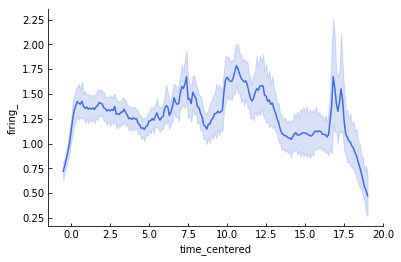

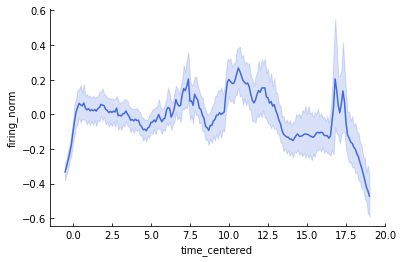

In [221]:
### Example of alignemnt of all teh trials of 1 neuron
neuron['time_centered'] = neuron['times'] - neuron['Stimulus_ON'] 
neuron['time_centered'] = np.round(neuron.time_centered/1000, 1)
neuron['firing_'] = neuron['firing']*1000
neuron['firing_norm'] = (neuron['firing_']-neuron['firing_'].mean() ) / neuron['firing_'].std()

plt.figure()
sns.lineplot(x='time_centered', y='firing_', data=neuron, color='royalblue')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.show()

plt.figure()
sns.lineplot(x='time_centered', y='firing_norm', data=neuron, color='royalblue')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.show()

In [212]:
len(os.listdir('C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\neurons\\'))

54

0 1035


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


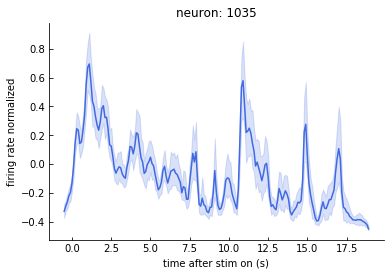

1 1073


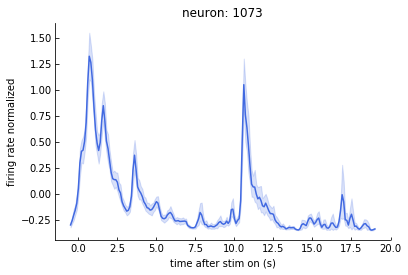

2 1097


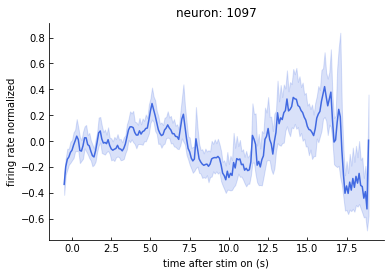

3 1145


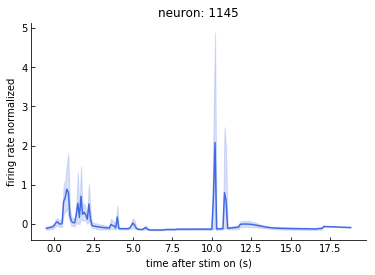

4 1193


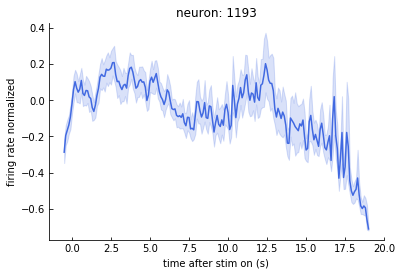

5 1203


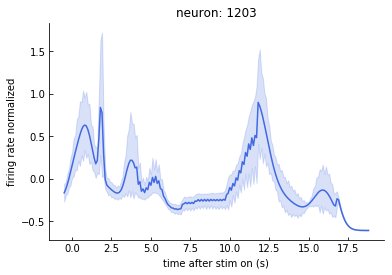

6 1215


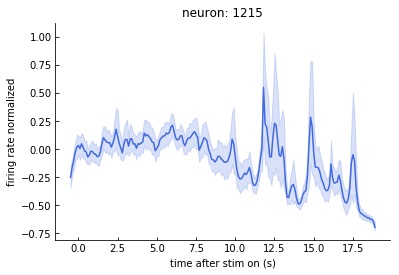

7 1225


In [ ]:
frames=[]

for idx, neuron_file in enumerate(os.listdir('C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\neurons\\')):
    print(idx, neuron_file.split('.')[0])
    neuron = pd.read_excel( 'C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\neurons\\' + neuron_file )
    #
    neuron['time_centered'] = neuron['times'] - neuron['Stimulus_ON'] 
    neuron['time_centered'] = np.round(neuron.time_centered/1000, 1)
    neuron['firing_'] = neuron['firing']*1000
    neuron['firing_norm'] = (neuron['firing_']-neuron['firing_'].mean() ) / neuron['firing_'].std()
    plt.figure()
    sns.lineplot(x='time_centered', y='firing_norm', data=neuron, color='royalblue')
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.title('neuron: ' + neuron_file.split('.')[0])
    plt.ylabel('firing rate normalized')
    plt.xlabel('time after stim on (s)')
    plt.show()
    frames.append(neuron)

## Population average

In [ ]:
population = pd.concat(frames)

In [ ]:
len(population)

In [ ]:
plt.figure()
sns.lineplot(x='time_centered', y='firing_norm', data=population, color='darkblue')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('population')
plt.ylabel('firing rate normalized')
plt.xlabel('time after stim on (s)')
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


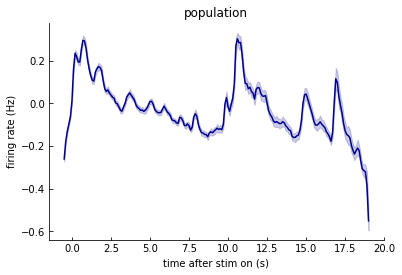

In [220]:
plt.figure()
sns.lineplot(x='time_centered', y='firing_norm', data=population, color='darkblue')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.title('population')
plt.ylabel('firing rate normalized')
plt.xlabel('time after stim on (s)')
plt.show()

In [ ]:
neuron.to_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\neurons\\' + str(N) + '.xlsx')

In [207]:
os.listdir('C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\neurons\\')[0].split('.')[0]

'1035'

In [192]:
neuron['time_centered'] = np.round(neuron.time_centered/1000, 1)

In [179]:
neuron = pd.concat(frames)
neuron.to_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\neurons\\' + str(N) + '.xlsx')

In [176]:
N_1794 = pd.concat(frames)
N_1794

,firing,times,trial,neuron,Delay_ON,Delay_OFF,Stimulus_ON,Response_ON,START,END,vector_answer,reward_side,hit
0,5.789192e-07,8.816137e+04,1,1794,8.906137e+04,8.916140e+04,8.866137e+04,8.936140e+04,8.816137e+04,9.552293e+04,0,0.0,1.0
1,1.066875e-06,8.818637e+04,1,1794,8.906137e+04,8.916140e+04,8.866137e+04,8.936140e+04,8.816137e+04,9.552293e+04,0,0.0,1.0
2,1.920920e-06,8.821137e+04,1,1794,8.906137e+04,8.916140e+04,8.866137e+04,8.936140e+04,8.816137e+04,9.552293e+04,0,0.0,1.0
3,3.379135e-06,8.823637e+04,1,1794,8.906137e+04,8.916140e+04,8.866137e+04,8.936140e+04,8.816137e+04,9.552293e+04,0,0.0,1.0
4,5.807670e-06,8.826137e+04,1,1794,8.906137e+04,8.916140e+04,8.866137e+04,8.936140e+04,8.816137e+04,9.552293e+04,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2.923331e-03,2.621932e+06,221,1794,2.605606e+06,2.615607e+06,2.605206e+06,2.615807e+06,2.604706e+06,2.622063e+06,0,0.0,1.0
690,2.874034e-03,2.621956e+06,221,1794,2.605606e+06,2.615607e+06,2.605206e+06,2.615807e+06,2.604706e+06,2.622063e+06,0,0.0,1.0
691,2.824888e-03,2.621982e+06,221,1794,2.605606e+06,2.615607e+06,2.605206e+06,2.615807e+06,2.604706e+06,2.622063e+06,0,0.0,1.0
692,2.775907e-03,2.622006e+06,221,1794,2.605606e+06,2.615607e+06,2.605206e+06,2.615807e+06,2.604706e+06,2.622063e+06,0,0.0,1.0


In [174]:
len(df.cluster_id.unique())
96464 * 54

5209056

In [168]:
times_spikes

array([125191.16666667, 125239.8       ])

In [55]:
stop_time =  nxt.END.unique()[0]*1000*ms ## End of the trial in ms
start_time = nxt.START.unique()[0]*1000*ms ## Start of the trial in ms

In [56]:
start_time

array(88161.36666667) * ms

In [66]:
len(times_spikes) / 7

7.142857142857143

In [65]:
stop_time- start_time

array(7361.56666667) * ms

In [57]:
spiketrain1 = SpikeTrain(times_spikes, units=ms, t_stop=stop_time, t_start=start_time) #spiketrain

In [58]:
histogram_rate = time_histogram([spiketrain1], 2*ms, output='rate') ##sampling rate de 2ms (bining) for example, increase for less temporal resolution

In [94]:
## get firing rate continuos
inst_rate = instantaneous_rate(spiketrain1, sampling_period=25*ms)
times_ = inst_rate.times.rescale(ms)
firing= inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten()

df_trial = pd.DataFrame({'times':times_, 'firing':firing}) #dataframe con times y firing

In [95]:
df_trial

,firing,times
0,5.789192e-07,88161.366667
1,1.066875e-06,88186.366667
2,1.920920e-06,88211.366667
3,3.379135e-06,88236.366667
4,5.807670e-06,88261.366667
...,...,...
289,3.637979e-18,95386.366667
290,0.000000e+00,95411.366667
291,-3.031649e-19,95436.366667
292,9.094947e-19,95461.366667


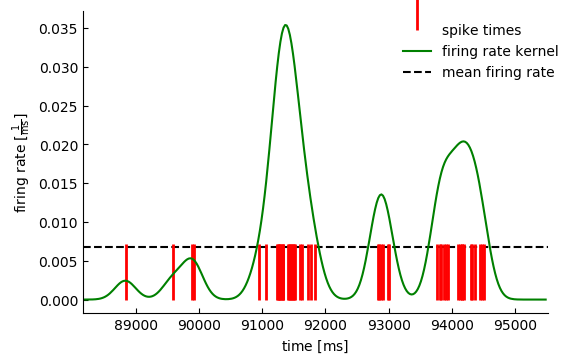

In [96]:
plt.figure(dpi=100) #dpi=150

# plotting the original spiketrain
plt.plot(spiketrain1, [0]*len(spiketrain1), 'r', marker=2, ms=40, markeredgewidth=2, lw=0, label='spike times')

# mean firing rate
plt.hlines(mean_firing_rate(spiketrain1), xmin=spiketrain1.t_start, xmax=spiketrain1.t_stop, linestyle='--', label='mean firing rate')

# convoluted firing rate
plt.plot(inst_rate.times.rescale(ms), inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten(), color='g', label='firing rate kernel')




# axis labels and legend
plt.xlabel('time [{}]'.format(spiketrain1.times.dimensionality.latex))
plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
plt.xlim(spiketrain1.t_start, spiketrain1.t_stop)
plt.legend( frameon=False, bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.show()